In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns

In [2]:
df_22 = pd.read_csv('state_NY_22.csv')

C:\Users\PanSt\AppData\Local\Temp\ipykernel_17768\2927935134.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_22 = pd.read_csv('state_NY_22.csv')


In [3]:
df = df_22.drop(columns=[
'applicant_age_above_62','co-applicant_age_above_62',
    'aus-2', 'aus-3', 'aus-4', 'aus-5',
    'denial_reason-2', 'denial_reason-3','denial_reason-4', 
    'activity_year', 'total_points_and_fees','county_code',
    'lei', 'multifamily_affordable_units', 'prepayment_penalty_term', 'state_code',
    'applicant_race-1','applicant_race-2', 'applicant_race-3','applicant_race-4', 'applicant_race-5', 'co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4','co-applicant_race-5', 'co-applicant_race_observed', 'co-applicant_sex_observed', 'applicant_race_observed' ,'co-applicant_race-1', 'co-applicant_sex',
    'applicant_sex','applicant_sex_observed',
    'applicant_ethnicity-1','applicant_ethnicity-2','applicant_ethnicity-3', 'applicant_ethnicity-4','applicant_ethnicity-5','applicant_ethnicity_observed', 'co-applicant_ethnicity-1','co-applicant_ethnicity-2', 'co-applicant_ethnicity-3','co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'co-applicant_ethnicity_observed', 
    'construction_method',
    'lien_status','loan_type',
    'ffiec_msa_md_median_family_income', 'derived_msa-md',
    'tract_one_to_four_family_homes', 'submission_of_application', 'occupancy_type', 'other_nonamortizing_features', 
    'derived_msa-md',
    'discount_points', 'lender_credits', 'intro_rate_period',
    'co-applicant_credit_score_type', 'co-applicant_age',
])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548905 entries, 0 to 548904
Data columns (total 41 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              545678 non-null  float64
 1   conforming_loan_limit                     542121 non-null  object 
 2   derived_loan_product_type                 548905 non-null  object 
 3   derived_dwelling_category                 548905 non-null  object 
 4   derived_ethnicity                         548905 non-null  object 
 5   derived_race                              548905 non-null  object 
 6   derived_sex                               548905 non-null  object 
 7   action_taken                              548905 non-null  int64  
 8   purchaser_type                            548905 non-null  int64  
 9   preapproval                               548905 non-null  int64  
 10  loan_purpose        

In [4]:
obj_columns = df.select_dtypes(include=['object'])
obj_columns

,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,origination_charges,loan_term,property_value,total_units,debt_to_income_ratio,applicant_age
0,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Joint,NaN,NaN,NaN,NaN,NaN,300,125000.0,1,>60%,45-54
1,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,265000.0,1,NaN,8888
2,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,1,NaN,8888
3,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,4,NaN,8888
4,U,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,1175000.0,1,NaN,8888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548900,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,6.75,NaN,NaN,NaN,360,275000.0,2,NaN,8888
548901,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,4,NaN,8888
548902,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,NaN,1,NaN,8888
548903,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,NaN,NaN,NaN,NaN,NaN,360,1435000.0,1,NaN,8888


## Object features casting ##

In [5]:
num_columns = list(filter(lambda col: (df[col] == 'Exempt').any(), obj_columns))
cat_columns = list(filter(lambda col: not (df[col] == 'Exempt').any(), obj_columns))
num_columns, cat_columns

(['loan_to_value_ratio',
  'interest_rate',
  'rate_spread',
  'total_loan_costs',
  'origination_charges',
  'loan_term',
  'property_value',
  'debt_to_income_ratio'],
 ['conforming_loan_limit',
  'derived_loan_product_type',
  'derived_dwelling_category',
  'derived_ethnicity',
  'derived_race',
  'derived_sex',
  'total_units',
  'applicant_age'])

In [6]:
df.replace(
{'debt_to_income_ratio': { #replacement with mean of interval
    '<20%': 0.1,
    '20%-<30%': 0.25,
    '30%-<36%': 0.33,
    '36': 0.36,
    '37': 0.37,
    '38': 0.38,
    '39': 0.39,
    '40': 0.40,
    '41': 0.41,
    '42': 0.42,
    '43': 0.43,
    '44': 0.44,
    '45': 0.45,
    '46': 0.46,
    '47': 0.47,
    '48': 0.48,
    '49': 0.49,
    '50%-60%': 0.55,
    '>60%': 0.8
},
 
   'applicant_age': {
       '<25': 18,
       '25-34': 30,
       '35-44': 39,
       '45-54': 49,
       '55-64': 59,
       '65-74': 69,
       '>74': 79,
       '8888': np.nan
},
 
 'total_loan_costs': {np.nan: 0.},
 'origination_charges': {np.nan: 0.},
 'loan_term':{'Exempt': 0}
}, inplace=True
)


# df_no_exempt[num_columns] = df_no_exempt[num_columns].apply(pd.to_numeric)
# df_no_exempt = df_no_exempt[df_no_exempt['denial_reason-1'] != 1111]

#todo: replace object categorical variables with int64 numbers (0,1..n)

In [7]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548905 entries, 0 to 548904
Data columns (total 41 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              545678 non-null  float64
 1   conforming_loan_limit                     542121 non-null  object 
 2   derived_loan_product_type                 548905 non-null  object 
 3   derived_dwelling_category                 548905 non-null  object 
 4   derived_ethnicity                         548905 non-null  object 
 5   derived_race                              548905 non-null  object 
 6   derived_sex                               548905 non-null  object 
 7   action_taken                              548905 non-null  int64  
 8   purchaser_type                            548905 non-null  int64  
 9   preapproval                               548905 non-null  int64  
 10  loan_purpose        

<Axes: >

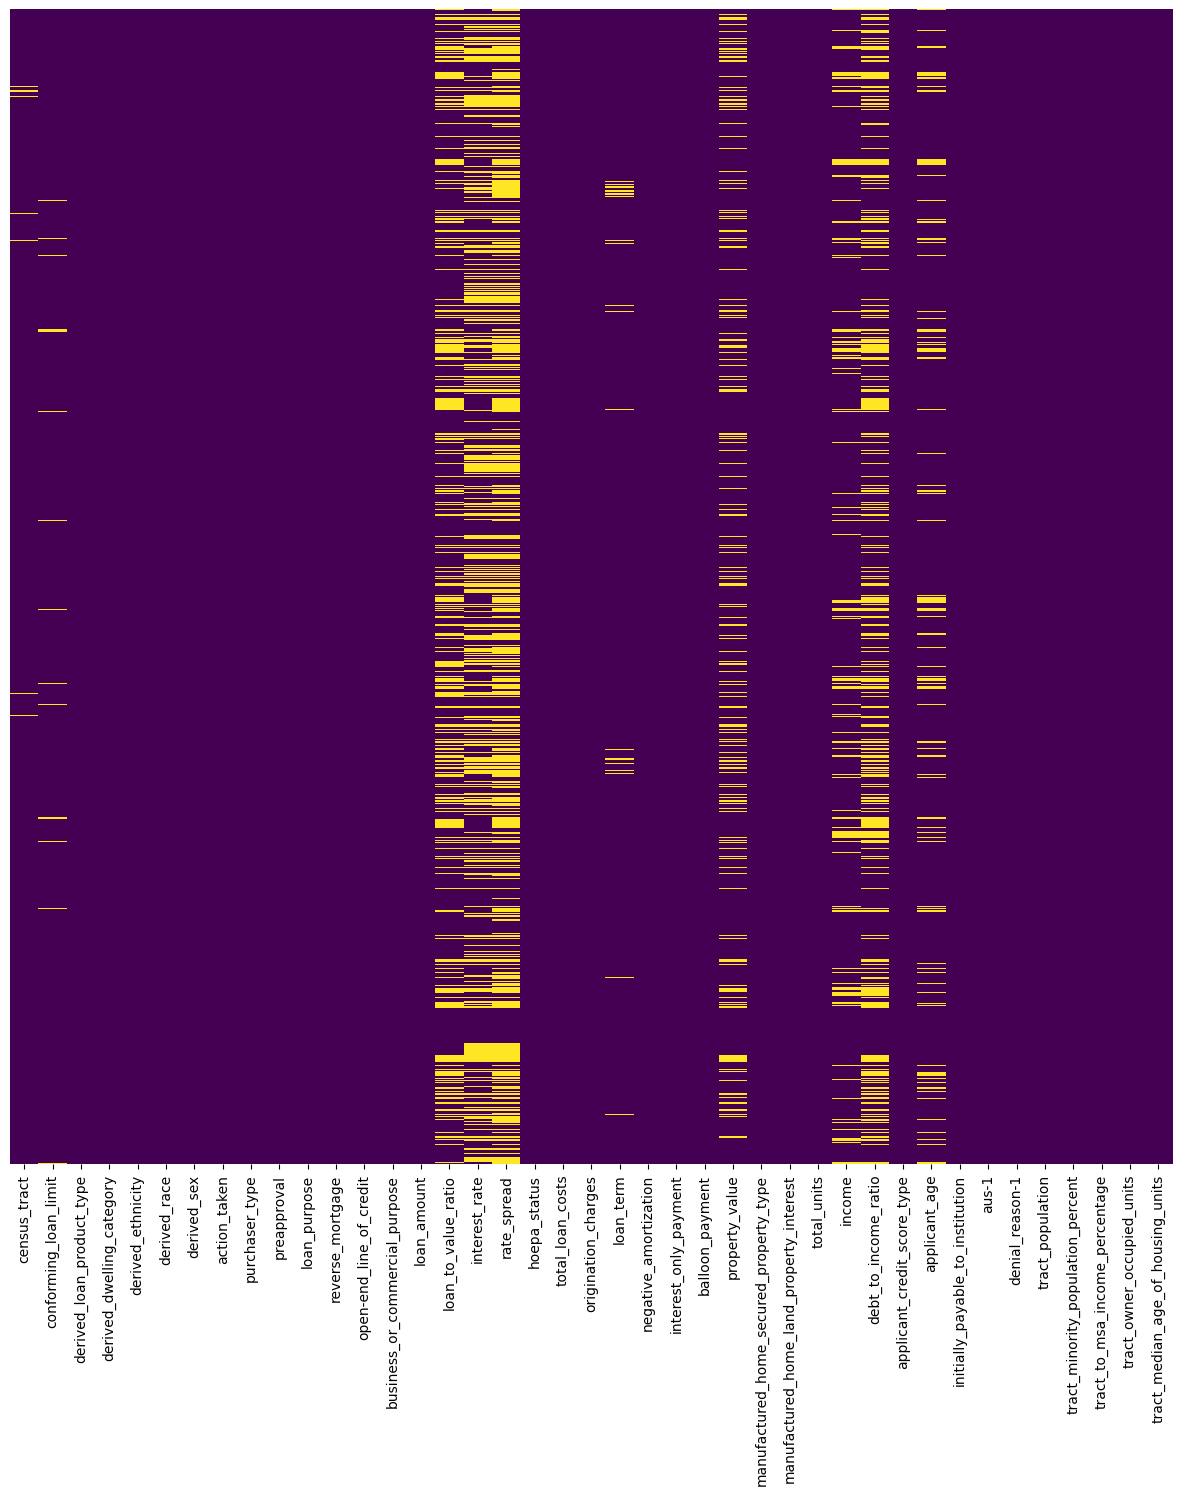

In [8]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

14.04: Further cleanup

1.Dropping rows with not filled applicant_age

In [9]:
df = df[df['applicant_age'].notna()]
df

,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,...,applicant_credit_score_type,applicant_age,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_median_age_of_housing_units
0,3.600505e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Joint,3,0,2,...,8,49.0,1,6,1,2142,32.31,109,339,70
109,NaN,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Sex Not Available,3,0,2,...,9,39.0,1,6,7,0,0.00,0,0,0
141,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,2,0,2,...,3,59.0,1,6,10,5698,36.17,244,693,40
142,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,...,1,69.0,1,6,10,6180,19.71,292,711,0
143,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,2,0,2,...,1,49.0,1,6,10,5698,36.17,244,693,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548896,3.606102e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Male,3,0,2,...,2,30.0,1,6,4,5127,93.21,54,51,67
548897,3.610316e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Male,3,0,2,...,2,39.0,1,6,1,8067,22.47,94,2163,27
548898,3.610320e+10,NC,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,3,0,2,...,2,49.0,1,6,1,1941,21.48,159,724,33
548899,3.608107e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,Race Not Available,Male,3,0,2,...,2,49.0,1,6,4,5423,97.49,110,864,63


2.Dropping rows with nan

In [10]:
from typing import List

columns_to_drop_nan: List[str] = [
    'conforming_loan_limit',
    'census_tract',
    'loan_term',
    'income'
]

df.dropna(subset=columns_to_drop_nan, inplace=True)
df

,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,...,applicant_credit_score_type,applicant_age,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_median_age_of_housing_units
0,3.600505e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Joint,3,0,2,...,8,49.0,1,6,1,2142,32.31,109,339,70
141,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,2,0,2,...,3,59.0,1,6,10,5698,36.17,244,693,40
142,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,...,1,69.0,1,6,10,6180,19.71,292,711,0
143,3.606101e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,2,0,2,...,1,49.0,1,6,10,5698,36.17,244,693,40
144,3.606100e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,0,2,...,3,59.0,1,6,10,2989,57.51,284,208,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548896,3.606102e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Male,3,0,2,...,2,30.0,1,6,4,5127,93.21,54,51,67
548897,3.610316e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Male,3,0,2,...,2,39.0,1,6,1,8067,22.47,94,2163,27
548898,3.610320e+10,NC,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,3,0,2,...,2,49.0,1,6,1,1941,21.48,159,724,33
548899,3.608107e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,Race Not Available,Male,3,0,2,...,2,49.0,1,6,4,5423,97.49,110,864,63


In [11]:
assert not df[columns_to_drop_nan].isnull().values.any(), "NaN values still exist in columns_to_drop_nan"
column_with_nan = df.columns[df.isna().any()].tolist()

for col in column_with_nan:
    print(col)

loan_to_value_ratio
interest_rate
rate_spread
property_value
debt_to_income_ratio


3.Convert types of string & int to int

In [12]:
df['loan_term'] = df['loan_term'].astype(np.int64)
df['total_units'] = df['loan_term'].astype(np.int64)

4.Fill in specific missing values with the mean value of their respective columns. We may consider using linear regression, as stated below.

## Version 1, agregated classification ##

In [13]:
#agregate denial_reason-1 to 2 classes 1 for 10, 0 for rest
denial_reason_columns = [col for col in df.columns if col.startswith('denial_reason')]

y = (df.pop('denial_reason-1') == 10).astype(np.int64)
y

0         0
141       1
142       1
143       1
144       1
         ..
548896    0
548897    0
548898    0
548899    0
548904    0
Name: denial_reason-1, Length: 470026, dtype: int64

<Axes: >

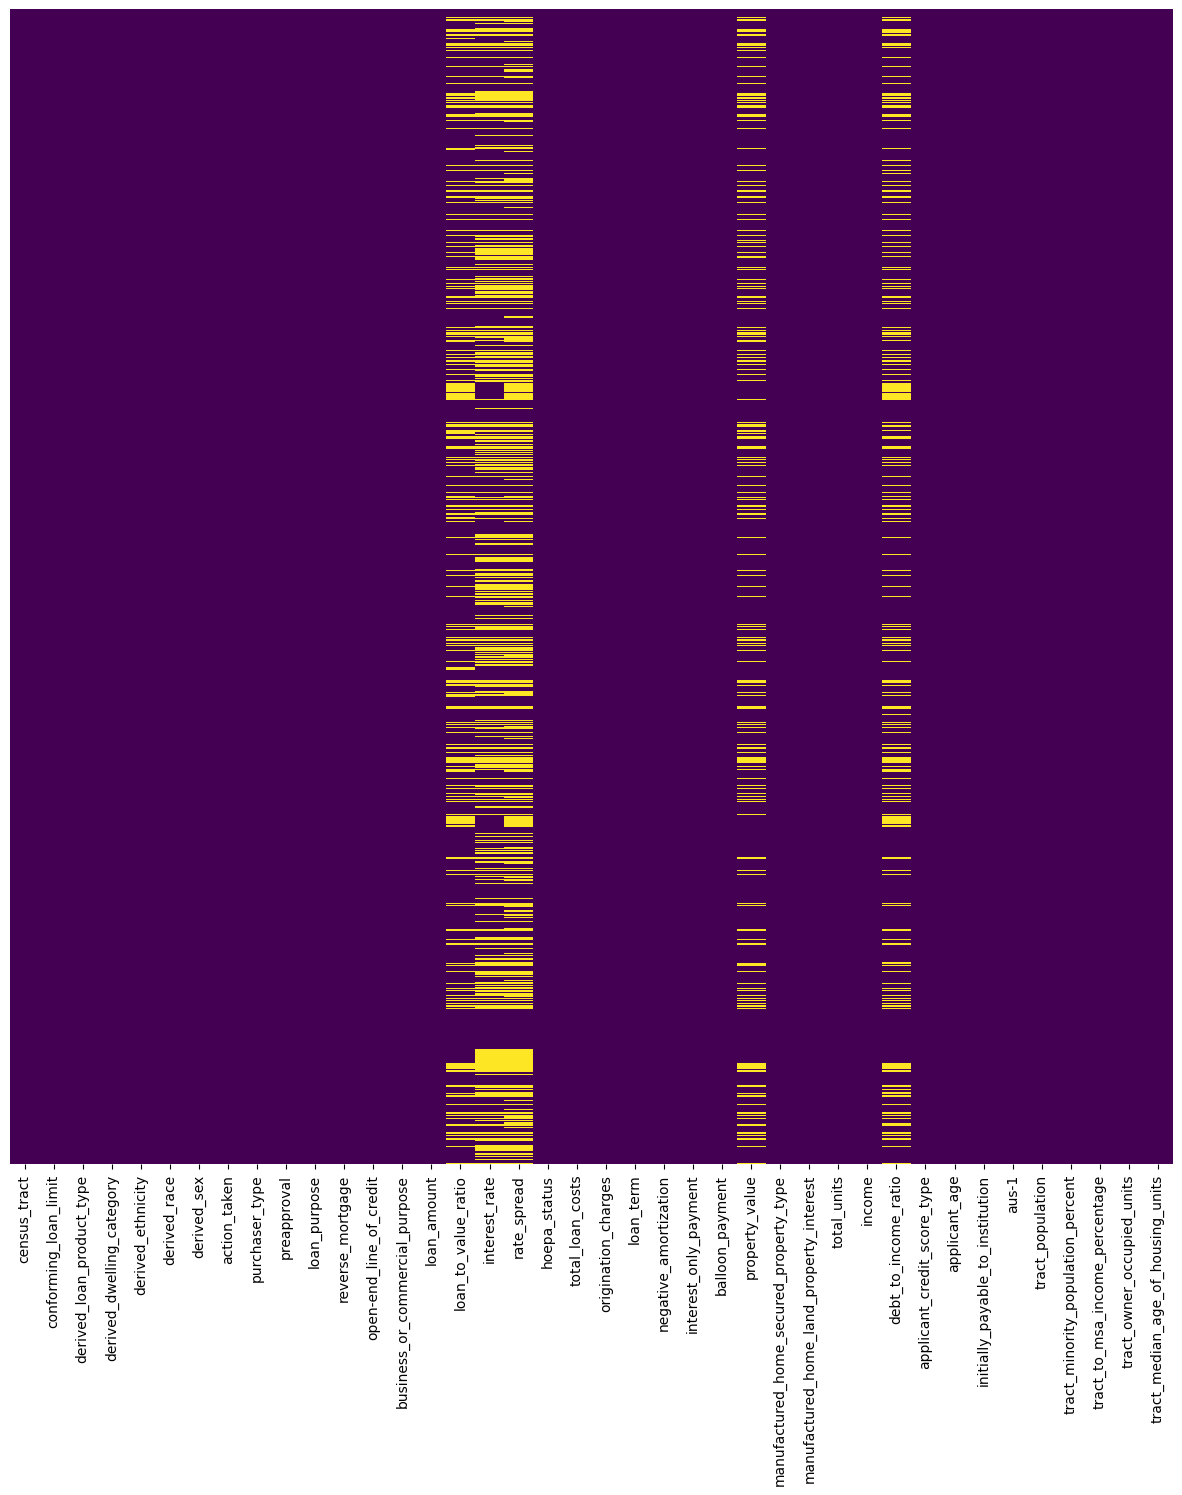

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

## Missing values complementation standarization ##
BOTH TRAIN AND TEST, BUT SEPARATELY

#### What to do with missing values? ####
+ total_loan_costs - replace with 0 - done
+ origination_charges - replace with 0 - done
+ confirming_loan_limit - drop rows with nan - done
+ census_tract - drop rows with nan - done
+ loan_term - drop rows with nan - done
+ income - drop rows with nan - done
+ loan_to_value_ratio - mean - done
+ interest_rate - mean or linear regression - done
+ rate_spread - mean or linear regression - done
+ property_value - mean or linear regression - done
+ debt_to_income_ratio - mean or linear regression - done

In [15]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
# fill missing values simpleImpute (happy way - mean, no regression for now)


categorical_columns = ['derived_loan_product_type',
 'derived_dwelling_category',
 'conforming_loan_limit',
 'derived_ethnicity',
 'derived_race',
 'derived_sex',
 'action_taken',
 'purchaser_type',
 'preapproval',
 'loan_purpose',
 'reverse_mortgage',
 'open-end_line_of_credit',
 'business_or_commercial_purpose',
 'hoepa_status',
 'negative_amortization',
 'interest_only_payment',
 'balloon_payment',
 'manufactured_home_secured_property_type',
 'manufactured_home_land_property_interest',
 'debt_to_income_ratio',
 'applicant_age',
 'initially_payable_to_institution',
 'aus-1']

categorical_nominal = ['derived_loan_product_type', 'derived_dwelling_category', 'conforming_loan_limit', 'derived_ethnicity', 'derived_race',
                      'derived_sex', 'action_taken', 'purchaser_type', 'preapproval','loan_purpose','reverse_mortgage','open-end_line_of_credit',
                      'business_or_commercial_purpose','hoepa_status', 'negative_amortization', 'interest_only_payment', 'balloon_payment',  
                      'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'initially_payable_to_institution', 'aus-1']
categorical_ordinal = ['debt_to_income_ratio', 'applicant_age']


# one hot encodeing nominal categorical features
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_nominal])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_nominal), index=df.index)

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_nominal, axis=1)

df_encoded.info()

# df_encoded

# df_encoded['total_units'].unique()
# df_encoded.select_dtypes(include=['object'])

# minmax standarization numerical features

<class 'pandas.core.frame.DataFrame'>
Index: 470026 entries, 0 to 548904
Columns: 116 entries, census_tract to aus-1_1111
dtypes: float64(102), int64(7), object(7)
memory usage: 419.6+ MB


# IMPORTANT!!! #
+ random_state=0 wherever possible
+ all gridsearches: cv=10, n_jobs=-1, scoring='roc_auc'
+ ... in params means name of component in pipeline, it is parameter to optimize for that component (see in pum notebook or docs)
+ if metrics are not improving, try different random over/under sampling 

## Train - test dataset split ##

In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470026 entries, 0 to 548904
Columns: 116 entries, census_tract to aus-1_1111
dtypes: float64(102), int64(7), object(7)
memory usage: 419.6+ MB


In [17]:
# TRAIN - TEST SPLIT
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split 
from sklearn.ensemble import RandomForestClassifier

print(df_encoded['loan_to_value_ratio'])

X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, y, test_size=0.25, stratify=y, random_state=0
)# random state 0
#train 3:1 test - may change later
X_train.shape[0], X_test.shape[0]

print(X_train['loan_to_value_ratio'])

0            NaN
141       72.979
142         80.0
143         75.0
144       70.165
           ...  
548896    56.981
548897      78.0
548898    29.851
548899      67.3
548904       NaN
Name: loan_to_value_ratio, Length: 470026, dtype: object
106648      30.0
80414       35.0
350545       NaN
334800    71.691
193621      85.0
           ...  
147020    Exempt
516885    55.055
105724      80.0
27184     39.648
430043      80.0
Name: loan_to_value_ratio, Length: 352519, dtype: object


In [18]:
assert isinstance(X_train, pd.DataFrame)
assert isinstance(X_test, pd.DataFrame)
assert isinstance(y_train, pd.Series)
assert isinstance(y_test, pd.Series)

In [59]:
from sklearn.linear_model import LinearRegression

def fill_with_mean(data: pd.DataFrame, column: str):
    missing_values = data[column].isna()
    
    X_train = data.loc[~missing_values].drop(columns=[column])
    y_train = data.loc[~missing_values, column]
    X_test = data.loc[missing_values].drop(columns=[column])
    
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train_imputed, y_train)

    predicted_values = lr.predict(X_test_imputed)
    
    data.loc[missing_values, column] = predicted_values


In [60]:
columns_to_fill_with_mean: List[str] = [
    'loan_to_value_ratio',
    'interest_rate',
    'rate_spread',
    'total_loan_costs',
    'origination_charges',
    'property_value',
    'debt_to_income_ratio'
]


for column in columns_to_fill_with_mean:
    fill_with_mean(X_train, column)

for column in columns_to_fill_with_mean:
    fill_with_mean(X_test, column)

In [61]:
assert not X_train.isnull().any().any(), "Missing values found in X_train"
assert not X_test.isnull().any().any(), "Missing values found in X_test"


<Axes: >

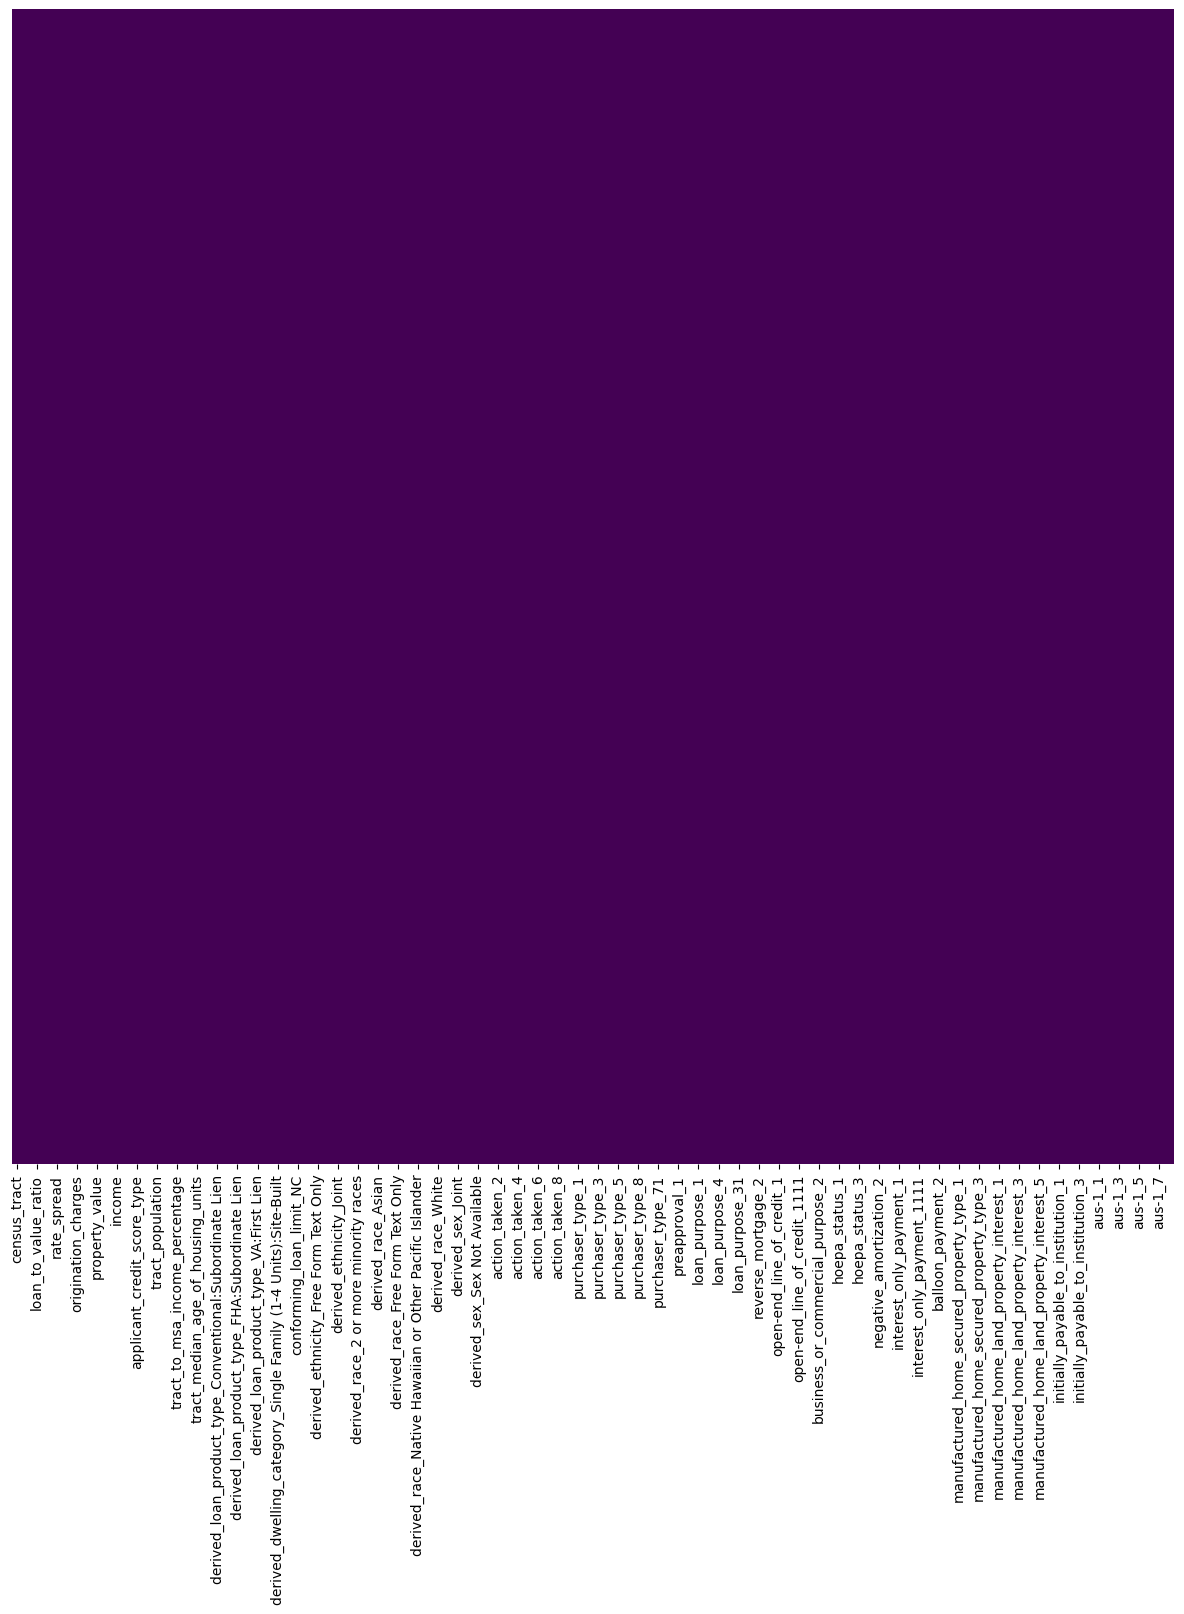

In [75]:
plt.figure(figsize=(15, 15))
sns.heatmap(X_train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

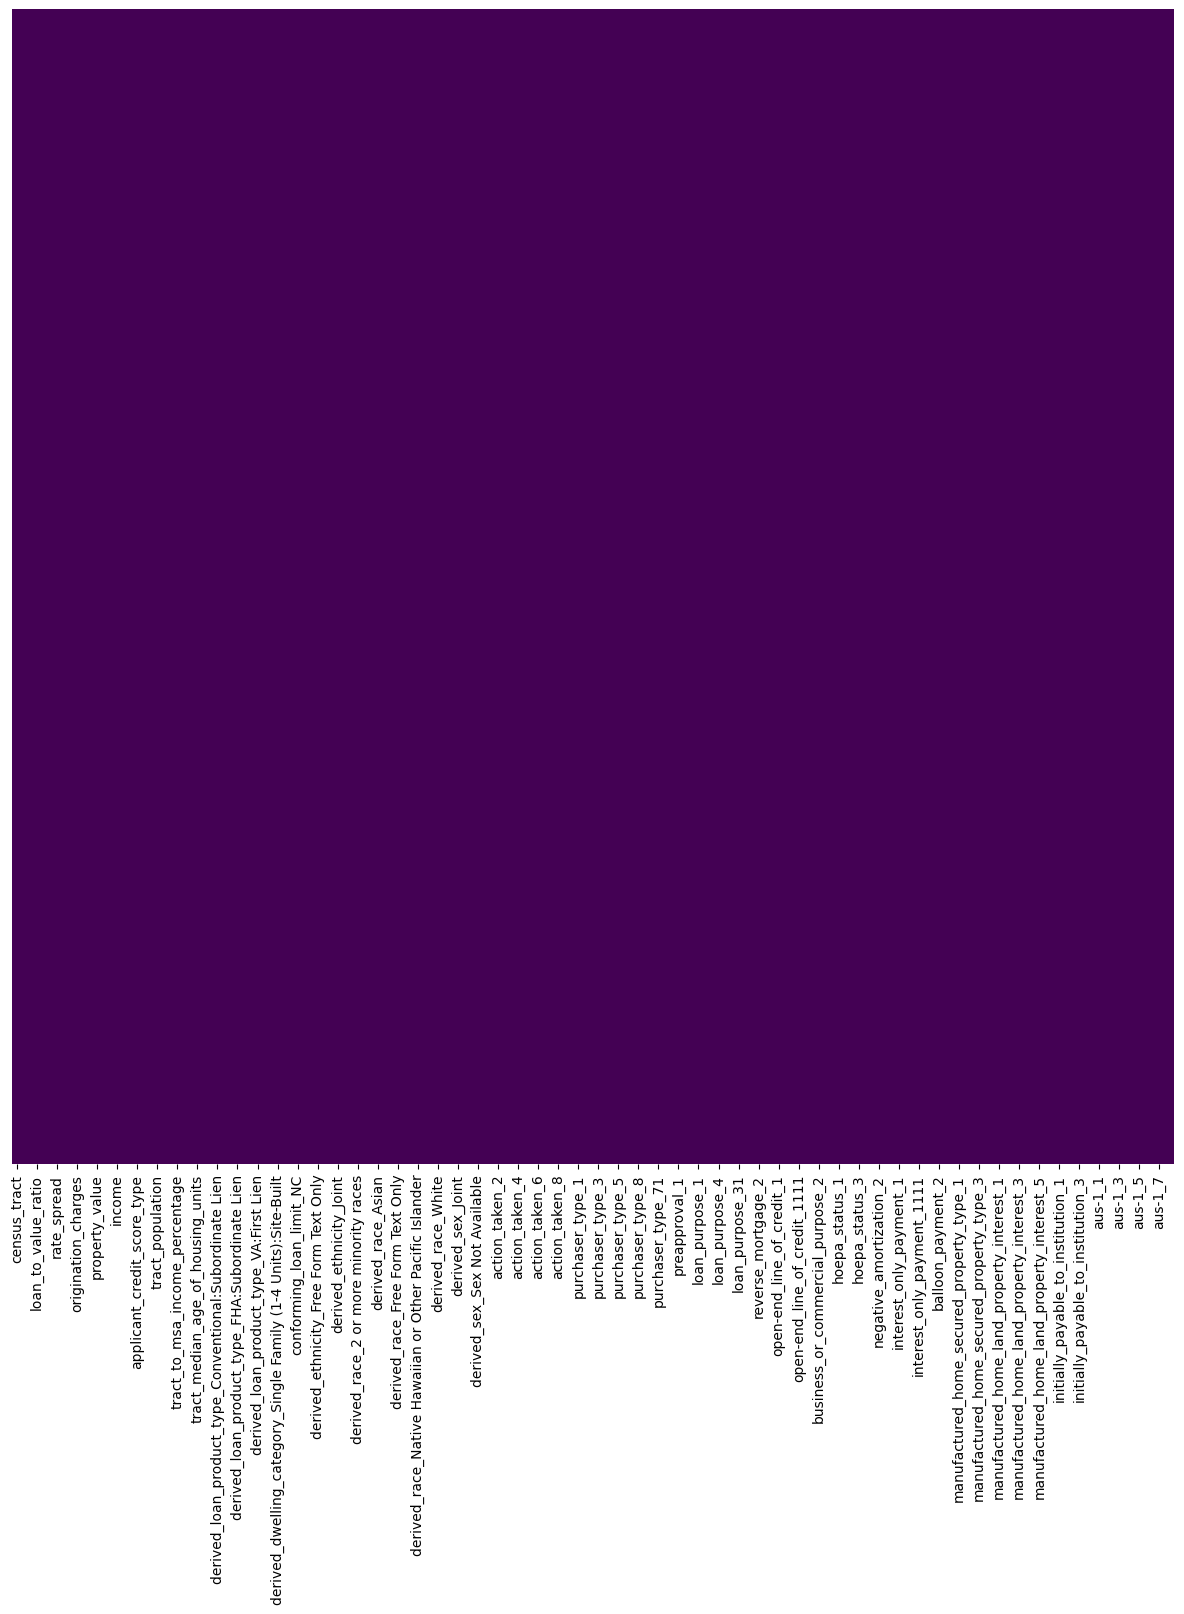

In [76]:
plt.figure(figsize=(15, 15))
sns.heatmap(X_test.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

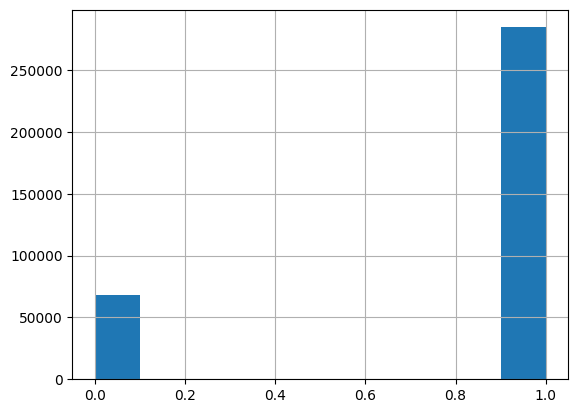

In [62]:
y_train.hist()

<Axes: >

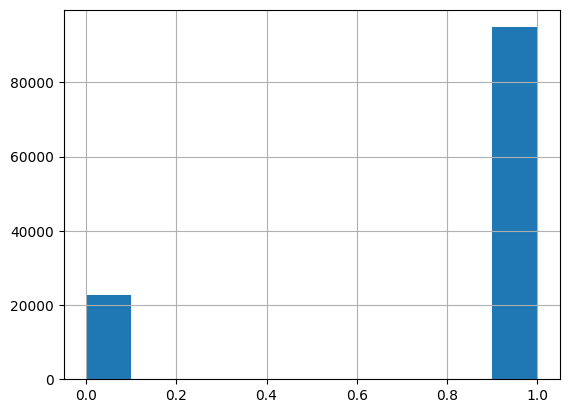

In [63]:
y_test.hist()

1. train - random undersampling of dominant class, reduce to 66%
2. train - random oversampling of minority class, double it

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, average_precision_score
# to test performance, from pum notebook
def assess_rf_performance(estimator: RandomForestClassifier, X_test, y_test) -> None:
    y_score = estimator.predict_proba(X_test)[:, 1]
    y_pred = estimator.predict(X_test)
    auroc = roc_auc_score(y_test, y_score)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)

    print(f"AUROC: {100 * auroc:.2f}%")
    print(f"F1-score: {100 * f1:.2f}%")
    print(f"accuracy: {100 * accuracy:.2f}%")
    print(f"avg precision: {100 * avg_precision:.2f}%")

In [65]:
def test_rf_performace(estimator: RandomForestClassifier, X_test, y_test) -> None:
    print("Train metrics")
    assess_rf_performance(estimator, X_train, y_train)
    print("Test metrics")
    assess_rf_performance(estimator, X_test, y_test)


## Random oversampling & undersampling ## 

In [66]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1/4, random_state=0)
rus = RandomUnderSampler(sampling_strategy=2/3, random_state=0)


In [67]:
X_ros_train, y_ros_train = ros.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Class cardinality after random oversampling')

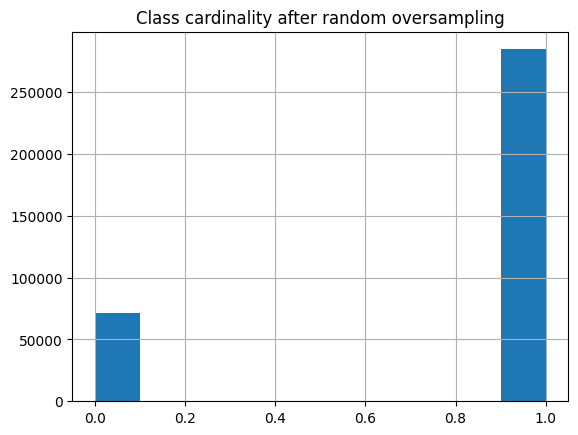

In [68]:
y_ros_train.hist()
plt.title('Class cardinality after random oversampling')

In [69]:
X_res_train, y_res_train = rus.fit_resample(X_ros_train, y_ros_train)

Text(0.5, 1.0, 'Class cardinality after random over & under sampling')

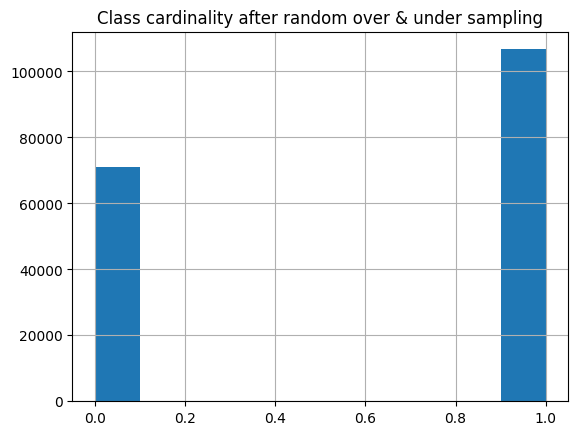

In [70]:
y_res_train.hist()
plt.title('Class cardinality after random over & under sampling')

In [71]:
rfc = RandomForestClassifier(random_state=0, n_jobs=-1)
rfc.fit(X_res_train, y_res_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [72]:
test_rf_performace(rfc, X_test, y_test)

Train metrics
AUROC: 100.00%
F1-score: 99.77%
accuracy: 99.63%
avg precision: 99.91%
Test metrics
AUROC: 99.98%
F1-score: 99.64%
accuracy: 99.42%
avg precision: 99.75%


## Undersampling ENN ## 
ONLY TRAIN SET
- ENN + hyperparameters tuning (gridsearch) on RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
- Pipeline with enn step before RFC

In [74]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import GridSearchCV # always create new estimator!

param_grid = {
    'enn__n_neighbors': [50, 100, 150],
    'rfc__criterion': ["entropy", "gini"]
}


rfc = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
enn = EditedNearestNeighbours(sampling_strategy=0.66, random_state=0)

pipeline = Pipeline(
    [
        ("enn", enn),
        ("rfc",rfc)
    ]
)

enn_pipeline = GridSearchCV(
    param_grid=param_grid, estimator=pipeline, scoring="roc_auc", cv=10
)

X_train_enn, y_train_enn = enn_pipeline.fit(X_ros_train, y_ros_train)

TypeError: EditedNearestNeighbours.__init__() got an unexpected keyword argument 'random_state'

In [ ]:
print(enn.best_params_, pipeline_tuned.best_score_)


In [ ]:
test_rf_performace(pipeline_tuned, X_test, y_test)

NameError: name 'pipeline_tuned' is not defined

# Oversampling ##

ONLY TRAIN SET
- SMOTE + hyperparameters tuning (gridsearch) on RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)

- Pipeline with smote step before RFC


In [ ]:
from imblearn.over_sampling import SMOTE



param_grid = {
    "smote__k_neighbors": np.arange(1, 10),
    "smote__sampling_strategy": ['minority', 'not minority', 'not majority', 'all'],
    "rfc__criterion": ["entropy", "gini", "log_loss"]
}

rfc = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)
smote = SMOTE(sampling_strategy=0.5, random_state=0)

pipeline = Pipeline(
    [
        ("smote", smote),
        ("rfc", rfc)
    ]
)

smote_pipeline = GridSearchCV(
    param_grid=param_grid, estimator=pipeline, scoring="roc_auc", cv=10
)


X_train_smote, y_train_smote = smote_pipeline.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(smote_pipeline.best_params_, smote_pipeline.best_score_)

In [ ]:
test_rf_performace(smote_pipeline, X_test, y_test)

## Combined ##
try combined over & under sampling at once with optimal hyperparameters
- Pipeline with smoteenn step (with optimal parameters) before RFC

In [ ]:
from imblearn.combine import SMOTEENN

param_grid = {
    # TODO SMOTEENN PARAMS ?
    "rfc__criterion": ["entropy", "gini", "log_loss"]
}


smote = SMOTE(random_state=0) # TODO pass params from  smote_pipeline.best_params_
enn = EditedNearestNeighbours(random_state=0) # TODO pass params from  enn_pipeline.best_params_
smoteenn = SMOTEENN(random_state=0, enn=enn, smote=smote)

rfc = RandomForestClassifier(class_weight="balanced", random_state=0, n_jobs=-1)


pipeline = Pipeline(
    [
        ("smoteenn", smoteenn),
        ("rfc", rfc)
    ]
)

smoteenn_pipeline = GridSearchCV(
    param_grid=param_grid, estimator=pipeline, scoring="roc_auc", cv=10
)


X_train_smoteeenn, y_train_smoteenn = smoteenn_pipeline.fit(X_train, y_train)

In [ ]:
test_rf_performace(smote_pipeline, X_test, y_test)

In [ ]:
# TO CONSIDER PCA for 10-40 parameters.